In [15]:
import json
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt

In [16]:
def load_results(model_type):
    file_name = '../output/'+model_type+"/results_dict"
    #file_name = '/media/martijn/Data/Data/Models/output/'+model_type+"/results_dict"
    print file_name
    with open(file_name, 'rb') as f:
        results = json.load(f)
    return results

results_seq = load_results("TEST/sequential")
results_nonseq = load_results("TEST/non_sequential")
results_attention = load_results("TEST/attention")
save_destination = "../plots/"

../output/TEST/sequential/results_dict
../output/TEST/non_sequential/results_dict
../output/TEST/attention/results_dict


In [17]:
print results_attention['samples']
print results_seq['samples']
print results_nonseq['samples']


{u'nonseq': {u'10': 25.0, u'3': 912.0, u'2': 1238.0, u'5': 353.0, u'4': 595.0, u'7': 136.0, u'6': 201.0, u'9': 53.0, u'8': 82.0}, u'0': {u'0': 15275}, u'1': {u'1': 23156}, u'seq': {u'10': 40.0, u'3': 1731.0, u'2': 4566.0, u'5': 404.0, u'4': 762.0, u'7': 135.0, u'6': 209.0, u'9': 56.0, u'8': 71.0}}
{u'nonseq': {u'10': 25.0, u'3': 912.0, u'2': 1238.0, u'5': 353.0, u'4': 595.0, u'7': 136.0, u'6': 201.0, u'9': 53.0, u'8': 82.0}, u'0': {u'0': 15275}, u'1': {u'1': 23156}, u'seq': {u'10': 40.0, u'3': 1731.0, u'2': 4566.0, u'5': 404.0, u'4': 762.0, u'7': 135.0, u'6': 209.0, u'9': 56.0, u'8': 71.0}}
{u'nonseq': {u'10': 25.0, u'3': 912.0, u'2': 1238.0, u'5': 353.0, u'4': 595.0, u'7': 136.0, u'6': 201.0, u'9': 53.0, u'8': 82.0}, u'0': {u'0': 15275}, u'1': {u'1': 23156}, u'seq': {u'10': 40.0, u'3': 1731.0, u'2': 4566.0, u'5': 404.0, u'4': 762.0, u'7': 135.0, u'6': 209.0, u'9': 56.0, u'8': 71.0}}


# DCG

In [34]:
def dcg_to_list(dic,dcg_type, sequence_type):
    l = [0,0,0,0,0,0,0,0,0,0,0]
    key = dcg_type
    scores = dic[key][sequence_type]
    for length in scores.keys():
        l[int(length)] = scores[length]/dic['samples'][sequence_type][length]
    l[0] = dic[key]['0']['0']/dic['samples']['0']['0']
    l[1] = dic[key]['1']['1']/dic['samples']['1']['1']
    return l


def dcg_hist(dcg_type):
    begin = 0
    end = 11
    dcg_seq_nonseq = dcg_to_list(results_seq, dcg_type, 'nonseq')
    dcg_seq_seq = dcg_to_list(results_seq, dcg_type, 'seq')
    dcg_nonseq_nonseq = dcg_to_list(results_nonseq, dcg_type, 'nonseq')
    dcg_nonseq_seq = dcg_to_list(results_nonseq, dcg_type, 'seq')
    dcg_att_nonseq = dcg_to_list(results_attention,dcg_type, 'nonseq')
    dcg_att_seq = dcg_to_list(results_attention,dcg_type,  'seq')
    print dcg_seq_nonseq
    
    fig = plt.figure()
    plt.title(dcg_type + ': Non-Sequential sequences ')
    width = 0.3
    plt.bar(np.arange(begin,end),dcg_seq_nonseq[begin:end],  width, color='b', label='sequential')
    plt.bar(np.arange(begin,end)+width,dcg_nonseq_nonseq[begin:end],  width, color='r',label='non_sequential')
    plt.bar(np.arange(begin,end)+2*width,dcg_att_nonseq[begin:end],  width, color='g',label='attention')
    plt.xticks(np.arange(begin,end))
    plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
              ncol=1, fancybox=True, shadow=True, prop={'size': 10})
    plt.savefig(save_destination+dcg_type+"_nonseq_1-10.pdf", format='pdf')
    plt.show()
    
    fig = plt.figure()
    plt.title(dcg_type + ': Sequential sequences')
    width = 0.3
    plt.bar(np.arange(begin,end),dcg_seq_seq[begin:end],  width, color='b', label='sequential')
    plt.bar(np.arange(begin,end)+width,dcg_nonseq_seq[begin:end],  width, color='r',label='non_sequential')
    plt.bar(np.arange(begin,end)+2*width,dcg_att_seq[begin:end],  width, color='g',label='attention')
    plt.xticks(np.arange(begin,end))
    plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
              ncol=1, fancybox=False, shadow=True, prop={'size': 10})
    plt.savefig(save_destination+dcg_type+"_seq_1-10.pdf", format='pdf')
    plt.show()

def mean_dcg(dic, dcg_type):    
    out = 0.0
    for seq_type in dic[dcg_type]:
        for key in dic[dcg_type][seq_type]:
            out += dic[dcg_type][seq_type][key]
    return round(out/50000,3)
    


## LCS

0.516 0.892 1.141 1.586
0.524 0.875 1.131 1.571
0.527 0.873 1.131 1.581
[0.9022367703218767, 0.475103644843669, 0.14539579967689822, 0.08114035087719301, 0.052100840336134456, 0.0419263456090651, 0.03731343283582092, 0.029411764705882342, 0.038109756097560975, 0.035639412997903575, 0.039999999999999994]


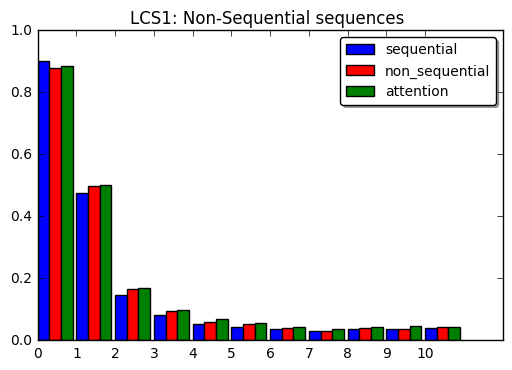

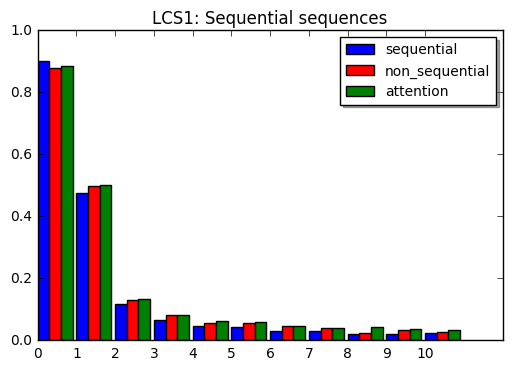

[1.5120988669484774, 0.7678289032255642, 0.4047230829198428, 0.274698442461626, 0.22173288962335364, 0.19362363933428056, 0.16501615558221033, 0.1475820370798346, 0.14946110926611703, 0.13479447139113687, 0.14785578521428744]


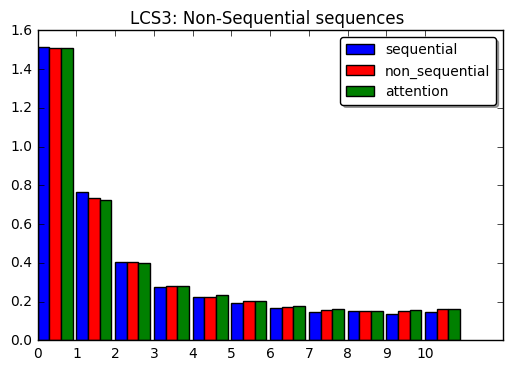

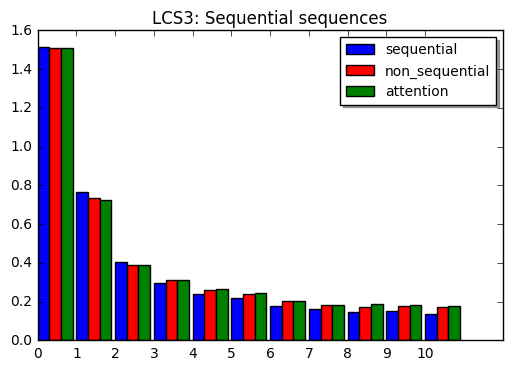

[1.8656178579603606, 0.9616282285382222, 0.6239659731836047, 0.46674121403670826, 0.38097263602943976, 0.33880485310108494, 0.2986236643111577, 0.2674847102807156, 0.26188936823116216, 0.2577357618481118, 0.2621346013540429]


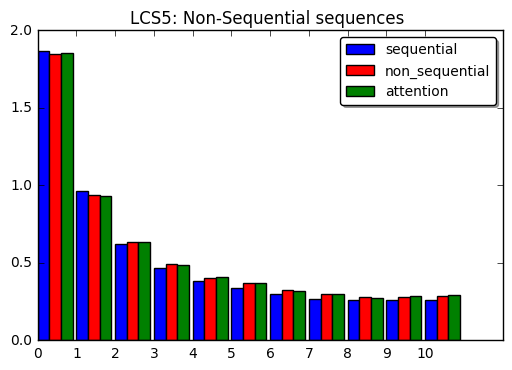

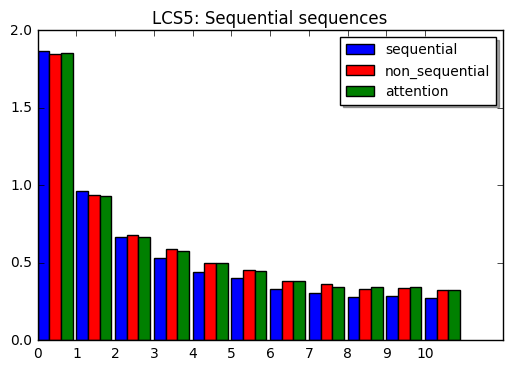

[2.527844061457304, 1.2926934563654675, 0.9810868001825751, 0.8118190701715126, 0.6996090488451305, 0.6374244569275587, 0.5776870536841245, 0.5255069866940917, 0.512441904144582, 0.5311565508554495, 0.5214956399069552]


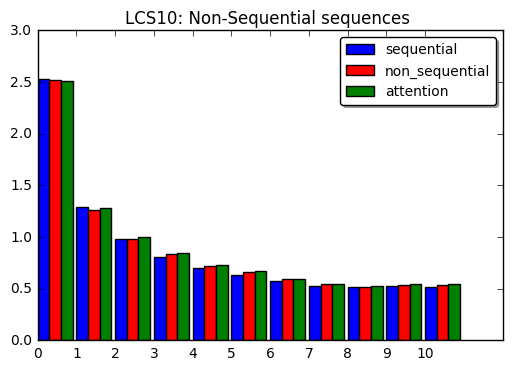

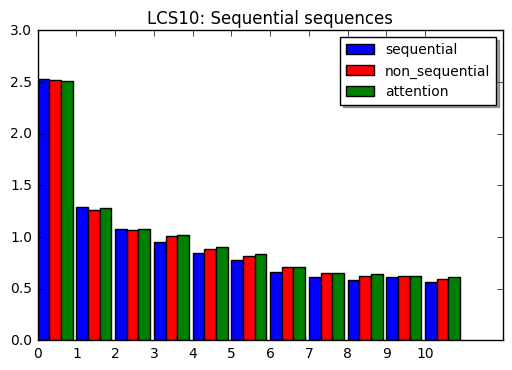

In [35]:
mean_lcs1_seq = mean_dcg(results_seq, 'LCS1')
mean_lcs3_seq = mean_dcg(results_seq, 'LCS3')
mean_lcs5_seq = mean_dcg(results_seq, 'LCS5')
mean_lcs10_seq = mean_dcg(results_seq, 'LCS10')
mean_lcs1_nonseq = mean_dcg(results_nonseq, 'LCS1')
mean_lcs3_nonseq = mean_dcg(results_nonseq, 'LCS3')
mean_lcs5_nonseq = mean_dcg(results_nonseq, 'LCS5')
mean_lcs10_nonseq = mean_dcg(results_nonseq, 'LCS10')
mean_lcs1_attention = mean_dcg(results_attention, 'LCS1')
mean_lcs3_attention = mean_dcg(results_attention, 'LCS3')
mean_lcs5_attention = mean_dcg(results_attention, 'LCS5')
mean_lcs10_attention = mean_dcg(results_attention, 'LCS10')

print mean_lcs1_seq, mean_lcs3_seq, mean_lcs5_seq, mean_lcs10_seq
print mean_lcs1_nonseq, mean_lcs3_nonseq, mean_lcs5_nonseq, mean_lcs10_nonseq
print mean_lcs1_attention, mean_lcs3_attention, mean_lcs5_attention, mean_lcs10_attention

dcg_hist('LCS1')
dcg_hist('LCS3')
dcg_hist('LCS5')
dcg_hist('LCS10')

## Distance

0.686 1.262 1.628 2.296
0.686 1.261 1.621 2.295
0.688 1.262 1.623 2.295
[0.9022367703218767, 0.7375410260839523, 0.38179859989229453, 0.27028508771929916, 0.21042016806722844, 0.17365439093484367, 0.14818763326225998, 0.12867647058823528, 0.11534552845528441, 0.1035639412997903, 0.09454545454545453]


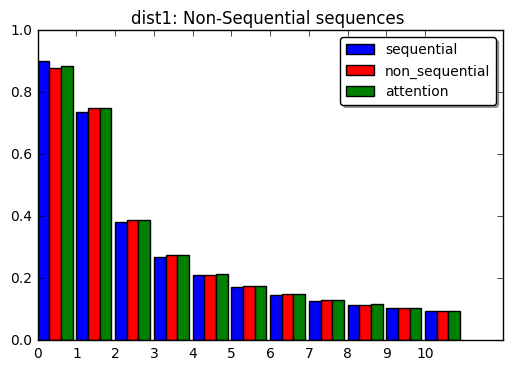

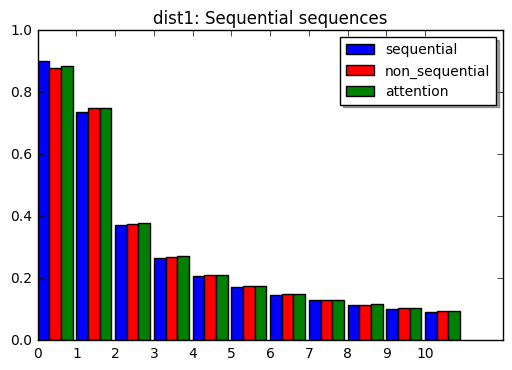

[1.5120988669484774, 1.3912838101364977, 0.842618325394889, 0.6024850510200813, 0.4720174360628067, 0.38791714663730575, 0.3284765030443657, 0.28527033891289555, 0.2539181572997264, 0.22672965520066202, 0.20761764416311748]


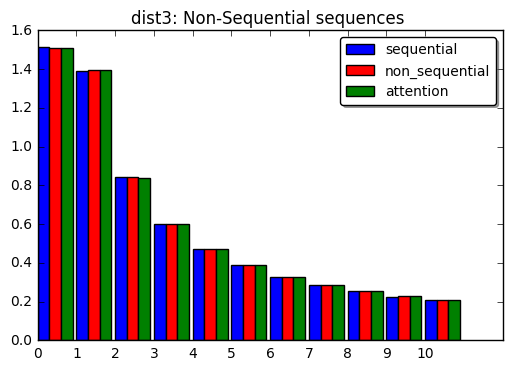

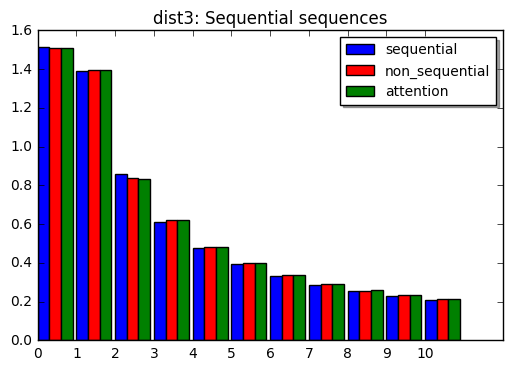

[1.8656178579603606, 1.8027144780602034, 1.1688772281758018, 0.8544723591561649, 0.6693016573145866, 0.5499653670018372, 0.46533590268735425, 0.4030929754290499, 0.3579971365596749, 0.3215745685740915, 0.29364059031627954]


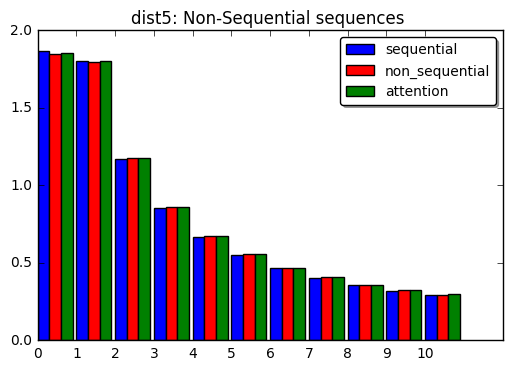

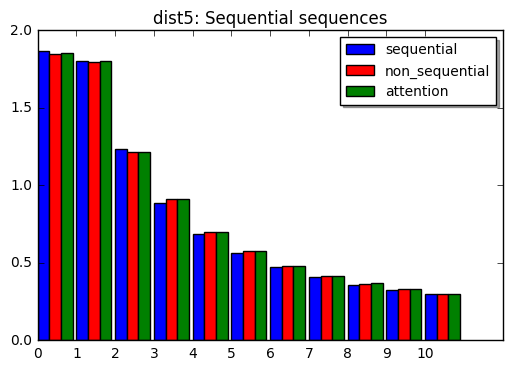

[2.527844061457304, 2.5451811335357974, 1.7432006332371404, 1.3314155488150157, 1.0526845173377177, 0.8675056019512128, 0.7342629080494513, 0.6368979008529551, 0.5655703095609672, 0.513338401195703, 0.4652542456583186]


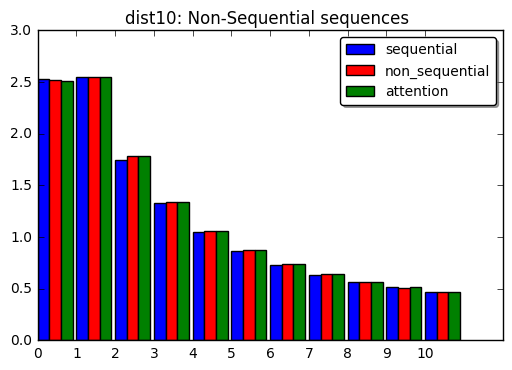

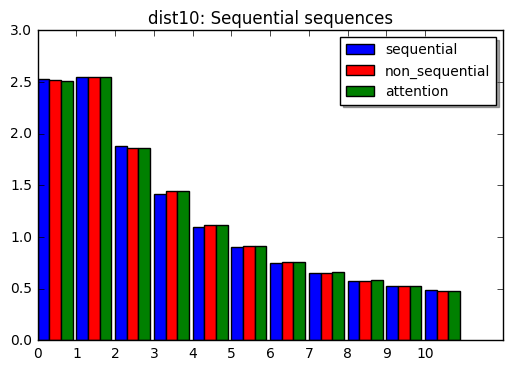

In [36]:
mean_dist1_seq = mean_dcg(results_seq, 'dist1')
mean_dist3_seq = mean_dcg(results_seq, 'dist3')
mean_dist5_seq = mean_dcg(results_seq, 'dist5')
mean_dist10_seq = mean_dcg(results_seq, 'dist10')
mean_dist1_nonseq = mean_dcg(results_nonseq, 'dist1')
mean_dist3_nonseq = mean_dcg(results_nonseq, 'dist3')
mean_dist5_nonseq = mean_dcg(results_nonseq, 'dist5')
mean_dist10_nonseq = mean_dcg(results_nonseq, 'dist10')
mean_dist1_attention = mean_dcg(results_attention, 'dist1')
mean_dist3_attention = mean_dcg(results_attention, 'dist3')
mean_dist5_attention = mean_dcg(results_attention, 'dist5')
mean_dist10_attention = mean_dcg(results_attention, 'dist10')

print mean_dist1_seq, mean_dist3_seq, mean_dist5_seq, mean_dist10_seq
print mean_dist1_nonseq, mean_dist3_nonseq, mean_dist5_nonseq, mean_dist10_nonseq
print mean_dist1_attention, mean_dist3_attention, mean_dist5_attention, mean_dist10_attention

dcg_hist('dist1')
dcg_hist('dist3')
dcg_hist('dist5')
dcg_hist('dist10')

# Reciprocal Rank

0.602433424964
0.601090226551
0.603528295815
0.602
0.601
0.604


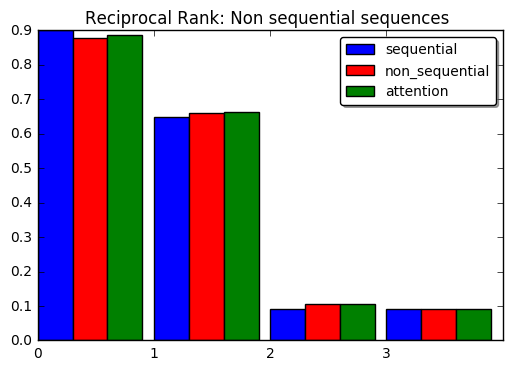

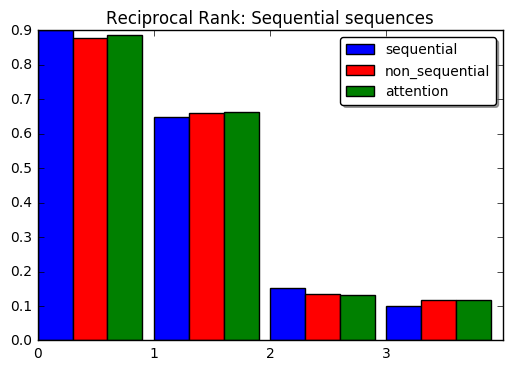

In [38]:
def rr_tolist(dic, sequence_type):
    l = [0,0,0,0,0,0,0,0,0,0,0]
    scores = dic['recip_rank'][sequence_type]
    for key in scores.keys():
        l[int(key)] = scores[key]/dic['samples'][sequence_type][key]
    l[0] = dic['recip_rank']['0']['0']/dic['samples']['0']['0']
    l[1] = dic['recip_rank']['1']['1']/dic['samples']['1']['1']
    return l

def mean_rr(dic):
    out = 0.0
    for seq_type in dic['recip_rank']:
        for key in dic['recip_rank'][seq_type]:
            out += dic['recip_rank'][seq_type][key]
    return out/50000

print mean_rr(results_seq)
print mean_rr(results_nonseq)
print mean_rr(results_attention)
print np.round(mean_rr(results_seq),3)
print np.round(mean_rr(results_nonseq),3)
print np.round(mean_rr(results_attention),3)

begin = 0
end = 4

rr_seq_seq = rr_tolist(results_seq, 'seq')
rr_seq_nonseq = rr_tolist(results_seq, 'nonseq')
rr_nonseq_seq = rr_tolist(results_nonseq, 'seq')
rr_nonseq_nonseq = rr_tolist(results_nonseq, 'nonseq')
rr_att_seq = rr_tolist(results_attention, 'seq')
rr_att_nonseq = rr_tolist(results_attention, 'nonseq')

fig = plt.figure()
plt.title('Reciprocal Rank: Non sequential sequences ')
width = 0.3
plt.bar(np.arange(begin,end),rr_seq_nonseq[begin:end],  width, color='b', label='sequential')
plt.bar(np.arange(begin,end)+width,rr_nonseq_nonseq[begin:end],  width, color='r',label='non_sequential')
plt.bar(np.arange(begin,end)+2*width,rr_att_nonseq[begin:end],  width, color='g',label='attention')
plt.xticks(np.arange(begin,end))
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10})
plt.savefig(save_destination+"rr_nonseq_0-3.pdf", format='pdf', dpi=1200)
plt.show()


fig = plt.figure()
plt.title('Reciprocal Rank: Sequential sequences')
width = 0.3
plt.bar(np.arange(begin,end),rr_seq_seq[begin:end],  width, color='b', label='sequential')
plt.bar(np.arange(begin,end)+width,rr_nonseq_seq[begin:end],  width, color='r',label='non_sequential')
plt.bar(np.arange(begin,end)+2*width,rr_att_seq[begin:end],  width, color='g',label='attention')
plt.xticks(np.arange(begin,end))
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10})
plt.savefig(save_destination+"rr_seq_0-3.pdf", format='pdf', dpi=1200)
plt.show()


# Perplexity

[1.3342193247787164, 1.3397845204840657, 1.3375854210949005]


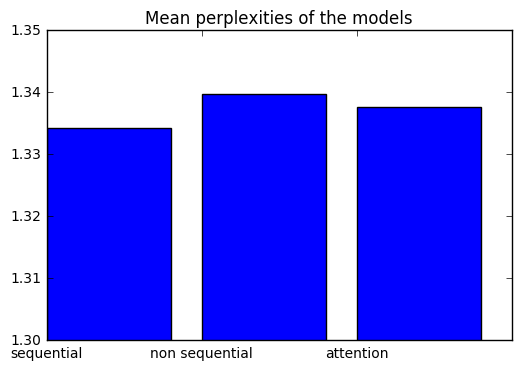

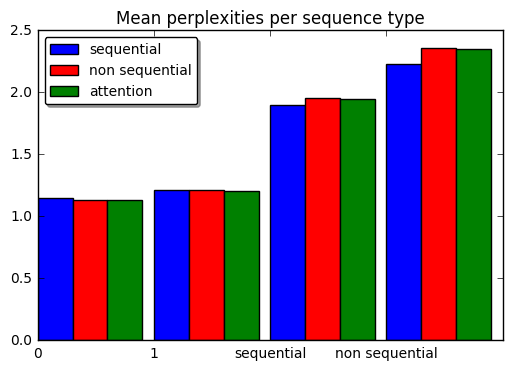

In [22]:
def get_num_s(dic, seqtype):
    s = 0
    for key in dic['samples'][seqtype]:
        s+=dic['samples'][seqtype][key]
    return s

def get_perpl(dic, seqtype):
    l = np.zeros(10)
    for key in dic['perplexity'][seqtype]:
        x = np.asarray(dic['perplexity'][seqtype][key])
        l += x
    p = np.power(2,(-1.0/get_num_s(dic,seqtype))*l)
    return np.mean(p)

def get_perpl2(dic):
    l = np.zeros(10)
    for seqtype in dic['perplexity']:
        for key in dic['perplexity'][seqtype]:
            x = np.asarray(dic['perplexity'][seqtype][key])
            l += x
    p = np.power(2,(-1.0/50000)*l)
    return np.mean(p)

def total_perpl(dic):
    p1 = get_perpl(dic,'0' )
    p2 = get_perpl(dic,'1' )
    p3 = get_perpl(dic,'seq' )
    p4 = get_perpl(dic,'nonseq' )
    return [p1, p2, p3, p4]

m = [get_perpl2(results_seq),get_perpl2(results_nonseq),get_perpl2(results_attention)]
print m
l = ['sequential', 'non sequential', 'attention']

fig = plt.figure()
plt.title("Mean perplexities of the models")
plt.bar(np.arange(len(m)), m)
plt.xticks(np.arange(begin,end))
plt.xticks(np.arange(len(m)),l)
plt.ylim([1.3,1.35])
plt.savefig(save_destination+"mean_perpl.pdf", format='pdf', dpi=1200)
plt.show()


seq = total_perpl(results_seq)
nonseq = total_perpl(results_nonseq)
att = total_perpl(results_attention)

fig = plt.figure()
plt.title( "Mean perplexities per sequence type")
width=0.3
plt.bar(np.arange(len(seq)), seq,  width, color='b', label='sequential')
plt.bar(np.arange(len(nonseq))+width, nonseq,  width, color='r', label='non sequential')
plt.bar(np.arange(len(att))+2*width, att,  width, color='g', label='attention')
l = ['0', '1', 'sequential', 'non sequential']
plt.xticks(np.arange(4),l)
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10})
plt.savefig(save_destination+"perpl.pdf", format='pdf', dpi=1200)
plt.show()

# Loss

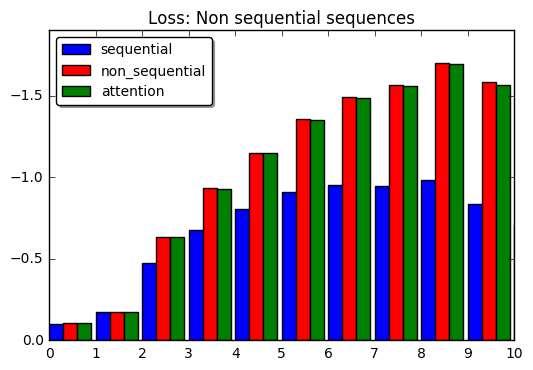

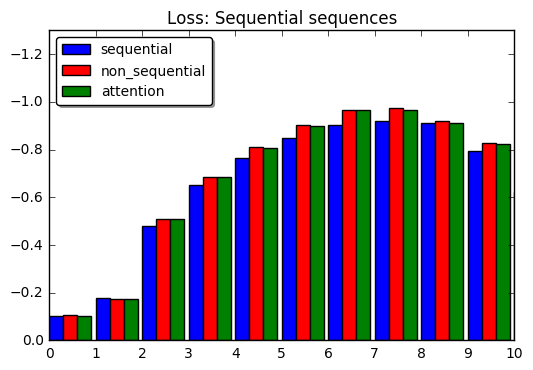

Sequential:  -0.255804502118
Non Sequential:  -0.283780399188
Attention:  -0.28252530815


In [37]:

def loss_tolist(dic, sequence_type):
    l = [0,0,0,0,0,0,0,0,0,0,0]
    scores = dic['loss'][sequence_type]
    for key in scores.keys():
        if scores[key] is float:
            l[int(key)] = scores[key]/dic['samples'][sequence_type][key]
        else:
            l[int(key)] = np.mean(scores[key])/dic['samples'][sequence_type][key]
    
    if dic['loss']['0']['0'] is float:
        l[0] = dic['loss']['0']['0']/dic['samples']['0']['0']
        l[1] = dic['loss']['1']['1']/dic['samples']['1']['1']
    else:
        l[0] = np.mean(dic['loss']['0']['0'])/dic['samples']['0']['0']
        l[1] = np.mean(dic['loss']['1']['1'])/dic['samples']['1']['1']
        
    return l
    
loss_seq_seq = loss_tolist(results_seq, 'seq')
loss_seq_nonseq = loss_tolist(results_seq, 'nonseq')
loss_nonseq_seq = loss_tolist(results_nonseq, 'seq')
loss_nonseq_nonseq = loss_tolist(results_nonseq, 'nonseq')
loss_att_seq = loss_tolist(results_attention, 'seq')
loss_att_nonseq = loss_tolist(results_attention, 'nonseq')

begin = 0
end = 11

fig = plt.figure()
plt.title('Loss: Non sequential sequences')
width = 0.3
plt.bar(np.arange(begin,end),loss_seq_nonseq[begin:end],  width, color='b', label='sequential')
plt.bar(np.arange(begin,end)+width,loss_nonseq_nonseq[begin:end],  width, color='r',label='non_sequential')
plt.bar(np.arange(begin,end)+2*width,loss_att_nonseq[begin:end],  width, color='g',label='attention')
plt.xticks(np.arange(begin,end))
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10})
plt.gca().invert_yaxis()
plt.axis([0,10,0,-1.9])
plt.savefig(save_destination+"loss_nonseq_0-10.pdf", format='pdf', dpi=1200)
plt.show()

fig = plt.figure()
plt.title('Loss: Sequential sequences')
width = 0.3
plt.bar(np.arange(begin,end),loss_seq_seq[begin:end],  width, color='b', label='sequential')
plt.bar(np.arange(begin,end)+width,loss_nonseq_seq[begin:end],  width, color='r',label='non_sequential')
plt.bar(np.arange(begin,end)+2*width,loss_att_seq[begin:end],  width, color='g',label='attention')
plt.xticks(np.arange(begin,end))
plt.gca().invert_yaxis()
plt.axis([0,10,0,-1.3])
plt.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10})
plt.savefig(save_destination+"loss_seq_0-10.pdf", format='pdf', dpi=1200)
plt.show()



l = 0.0
for seqtype in results_seq['loss'].keys():
    for key in results_seq['loss'][seqtype]:
        #print results_seq['loss'][seqtype][key]
        l += np.mean(results_seq['loss'][seqtype][key])

print "Sequential: ", l/50000.0

l = 0.0
for seqtype in results_nonseq['loss'].keys():
    for key in results_nonseq['loss'][seqtype]:
        #print results_seq['loss'][seqtype][key]
        l += np.mean(results_nonseq['loss'][seqtype][key])

print "Non Sequential: ", l/50000.0

l = 0.0
for seqtype in results_attention['loss'].keys():
    for key in results_attention['loss'][seqtype]:
        #print results_seq['loss'][seqtype][key]
        l += np.mean(results_attention['loss'][seqtype][key])

print "Attention: ", l/50000.0

# Samples


50000.0
[15275, 23156, 1238.0, 912.0, 595.0, 353.0, 201.0, 136.0, 82.0, 53.0, 25.0]
[15275, 23156, 4566.0, 1731.0, 762.0, 404.0, 209.0, 135.0, 71.0, 56.0, 40.0]


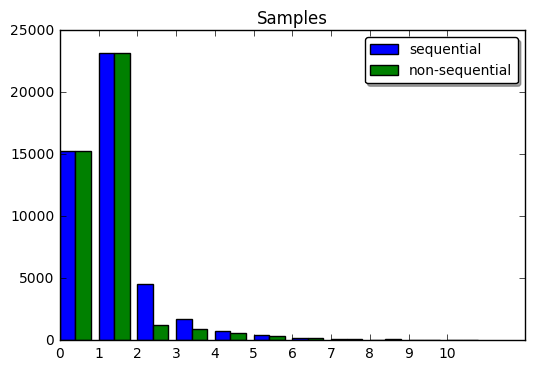

50000.0
[15275, 23156, 1238.0, 912.0, 595.0, 353.0, 201.0, 136.0, 82.0, 53.0, 25.0]
[15275, 23156, 4566.0, 1731.0, 762.0, 404.0, 209.0, 135.0, 71.0, 56.0, 40.0]


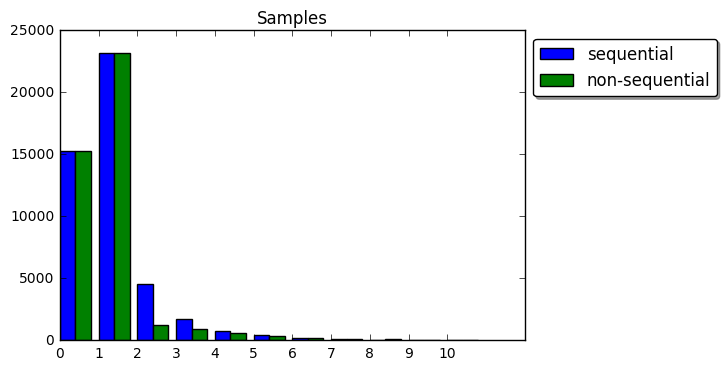

50000.0
[15275, 23156, 1238.0, 912.0, 595.0, 353.0, 201.0, 136.0, 82.0, 53.0, 25.0]
[15275, 23156, 4566.0, 1731.0, 762.0, 404.0, 209.0, 135.0, 71.0, 56.0, 40.0]


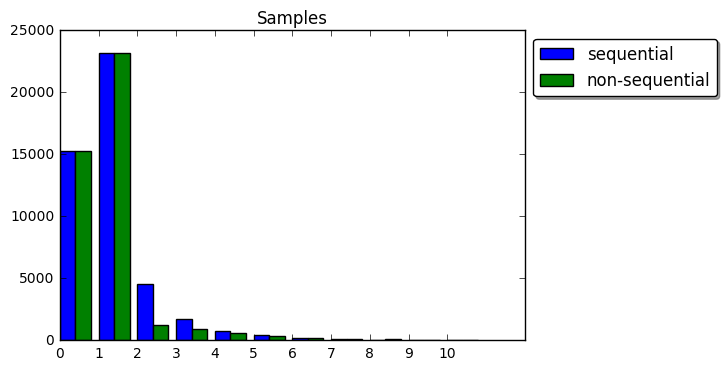

In [24]:
def samples_tolist(dic, start, end, seq_type):
    #end += 1
    l = np.zeros(end-start).tolist()
    for i in range(start,end):
        l[i-start] = dic['samples'][seq_type][str(i)]
    return l

seq_samples = samples_tolist(results_seq,2,11,'seq')
nonseq_samples = samples_tolist(results_seq,2,11,'nonseq')
samples_0 = samples_tolist(results_seq,0,1,'0')
samples_1 = samples_tolist(results_seq,1,2,'1')
print np.sum(seq_samples) + np.sum(nonseq_samples) + np.sum(samples_0) + np.sum(samples_1)
nonseq_samples = samples_0 + samples_1 + nonseq_samples
seq_samples = samples_0 + samples_1 + seq_samples
print nonseq_samples
print seq_samples

fig = plt.figure()
plt.title('Samples')
width = 0.4
plt.bar(np.arange(0,11),seq_samples,  width, color='b',label='sequential')
plt.bar(np.arange(0,11)+width,nonseq_samples,  width, color='g',label='non-sequential')
plt.xticks(np.arange(0,11))
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10})
plt.savefig(save_destination+"samples.pdf", format='pdf', dpi=1200)
plt.show()
    
    
seq_samples = samples_tolist(results_nonseq,2,11,'seq')
nonseq_samples = samples_tolist(results_nonseq,2,11,'nonseq')
samples_0 = samples_tolist(results_nonseq,0,1,'0')
samples_1 = samples_tolist(results_nonseq,1,2,'1')
print np.sum(seq_samples) + np.sum(nonseq_samples) + np.sum(samples_0) + np.sum(samples_1)
nonseq_samples = samples_0 + samples_1 + nonseq_samples
seq_samples = samples_0 + samples_1 + seq_samples
print nonseq_samples
print seq_samples

plt.title('Samples')
width = 0.4
plt.bar(np.arange(0,11),seq_samples,  width, color='b',label='sequential')
plt.bar(np.arange(0,11)+width,nonseq_samples,  width, color='g',label='non-sequential')
plt.xticks(np.arange(0,11))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),
          ncol=1, fancybox=True, shadow=True)

plt.show()    


seq_samples = samples_tolist(results_nonseq,2,11,'seq')
nonseq_samples = samples_tolist(results_nonseq,2,11,'nonseq')
samples_0 = samples_tolist(results_nonseq,0,1,'0')
samples_1 = samples_tolist(results_nonseq,1,2,'1')
print np.sum(seq_samples) + np.sum(nonseq_samples) + np.sum(samples_0) + np.sum(samples_1)
nonseq_samples = samples_0 + samples_1 + nonseq_samples
seq_samples = samples_0 + samples_1 + seq_samples
print nonseq_samples
print seq_samples

plt.title('Samples')
width = 0.4
plt.bar(np.arange(0,11),seq_samples,  width, color='b',label='sequential')
plt.bar(np.arange(0,11)+width,nonseq_samples,  width, color='g',label='non-sequential')
plt.xticks(np.arange(0,11))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),
          ncol=1, fancybox=True, shadow=True)

plt.show()    

In [25]:
x = np.array([0,0,1])
if type(x) == np.ndarray:
    print "jup"

jup


In [26]:
def is_sequential(sequence):
    for i in range(1, len(sequence)):
        if sequence[i] < sequence[i-1]:
            return False
    return True

is_sequential([0,1,0])

False

In [27]:
print results_seq['recip_rank']

{u'nonseq': {u'10': 2.272727272727272, u'3': 82.90909090909224, u'2': 112.54545454545672, u'5': 32.09090909090899, u'4': 54.09090909090961, u'7': 12.363636363636397, u'6': 18.272727272727312, u'9': 4.818181818181816, u'8': 7.45454545454545}, u'0': {u'0': 13747.176190476224}, u'1': {u'1': 15020.125000000991}, u'seq': {u'10': 3.7858585858585845, u'3': 173.55717893218159, u'2': 700.6994588744623, u'5': 36.8017676767677, u'4': 69.88943001443096, u'7': 12.272727272727305, u'6': 19.000000000000032, u'9': 5.090909090909088, u'8': 6.454545454545451}}


In [28]:
for key in results_seq:
    print key

loss
LCS5
LCS3
LCS1
dist5
recip_rank
dist1
samples
perplexity
dist3
LCS10
dist10
